In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.shape

(42100, 19)

In [5]:
df1 = df.copy(deep=True)
df1.drop(['id'],axis=1,inplace=True)
df1.shape

(42100, 18)

In [6]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 18 numerical variables

The numerical variables : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [7]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>1:
    print('The categorical variables :', categorical)

There are 0 categorical variables



No nulls

In [8]:
df1.isna().values.any()

False

corr

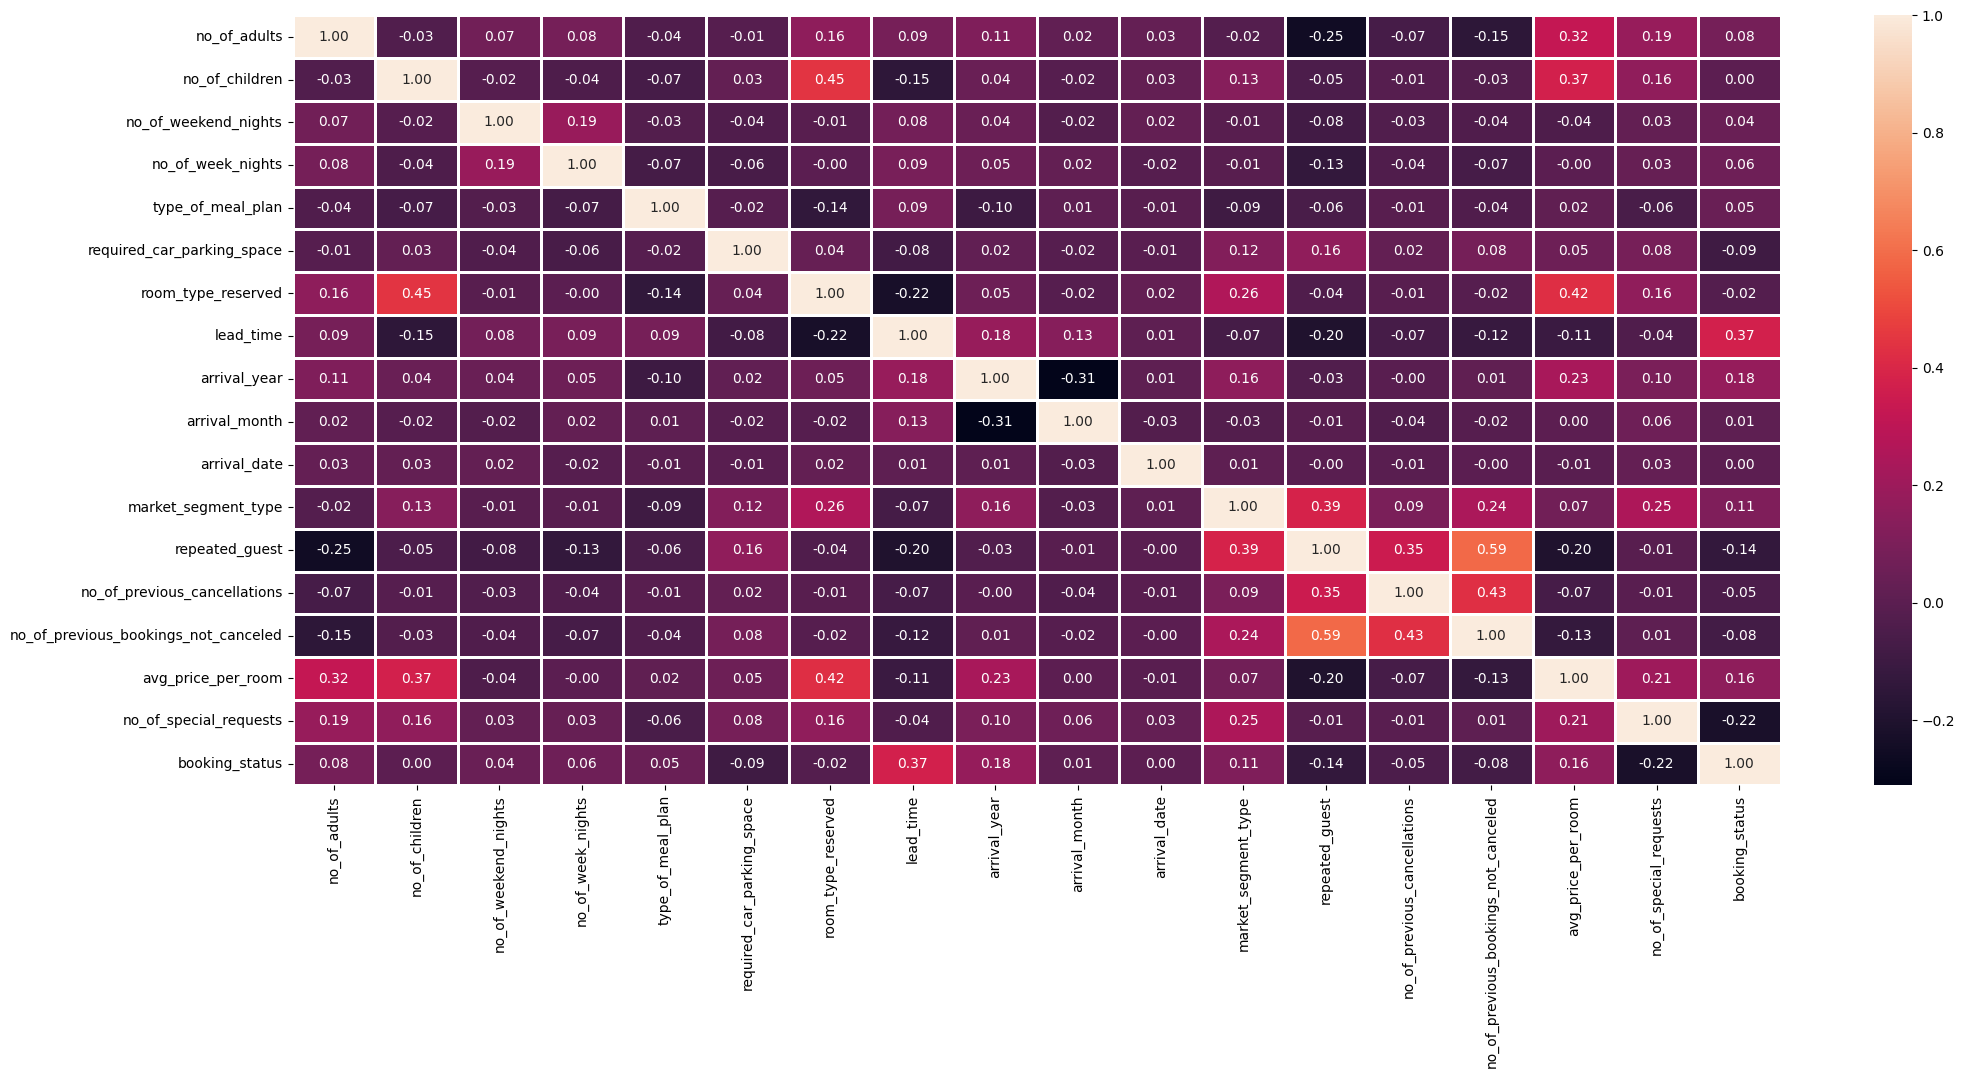

In [9]:
plt.figure(figsize=(24,10))
sns.heatmap(df1[numerical].corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

Outliers

In [10]:
numerical.remove('booking_status')

In [11]:
df1[numerical].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000


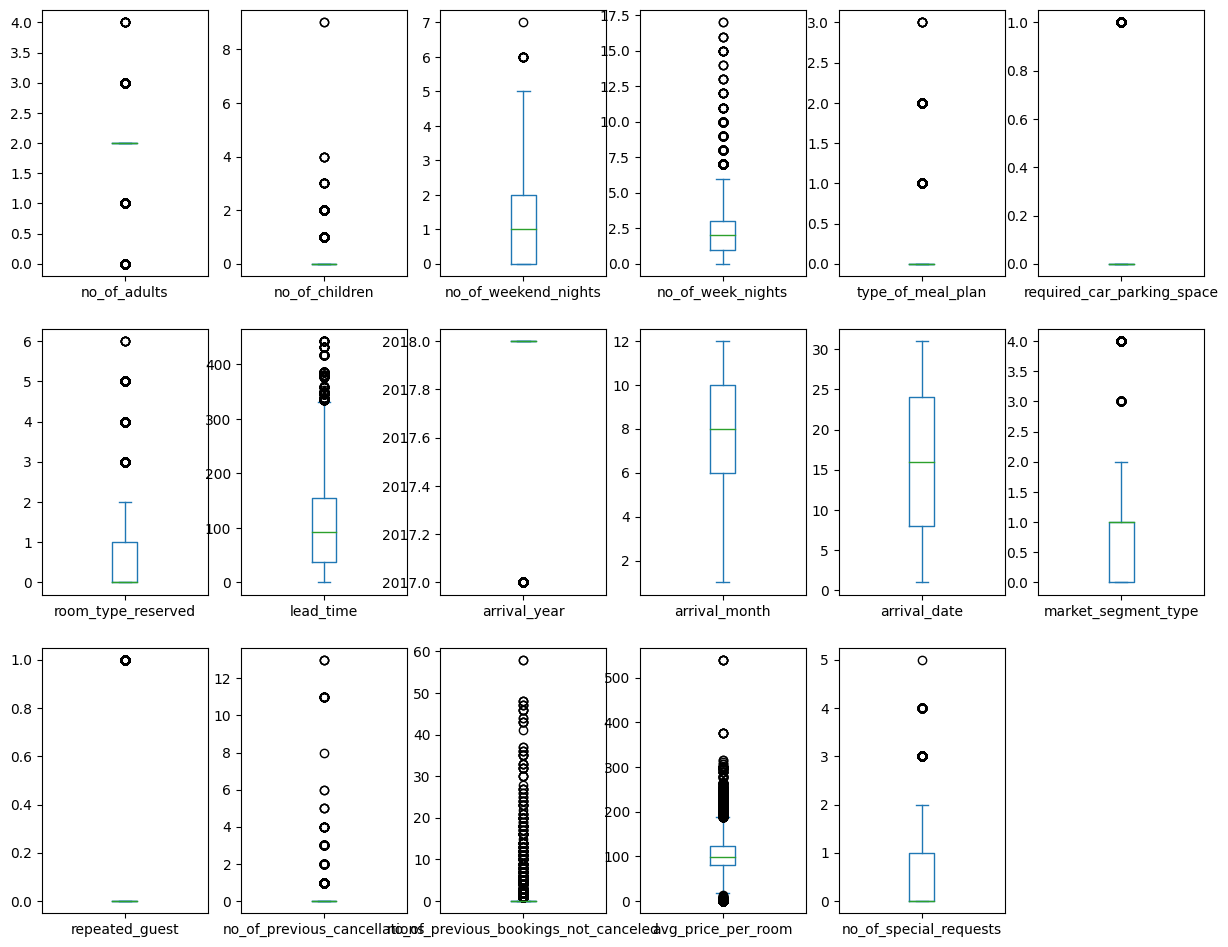

In [12]:
df1[numerical].plot(kind = "box",subplots = True,layout = (5,6),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

No need for outlier removal either! Only avg price looks sus

Feature Engineering

In [13]:
X = df1.drop(['booking_status'],axis=1)
y = df1.booking_status

X.shape, y.shape

((42100, 17), (42100,))

In [14]:
y.value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

In [15]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33680, 17), (8420, 17), (33680,), (8420,))

In [16]:
y_train.value_counts()

0    20446
1    13234
Name: booking_status, dtype: int64

smote because there is imbalance

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [19]:
y_train.value_counts()

0    20446
1    20446
Name: booking_status, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [77]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [78]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.7673
Test set score: 0.7540


In [79]:
y_pred = logreg.predict(X_test_RF)

In [80]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3915, 1235],
       [ 836, 2434]], dtype=int64)

In [81]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

0.7540380047505938

In [82]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.663396020714091

In [83]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.7443425076452599

KNN

In [84]:
from math import sqrt
print(sqrt(X_train.shape[1]))

4.123105625617661


In [85]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

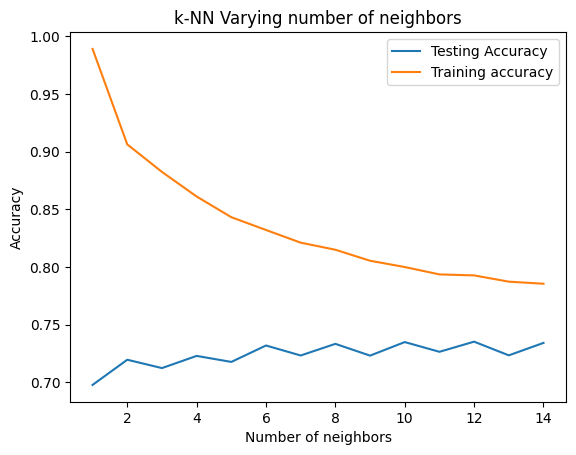

In [86]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=5,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 19 candidates, totalling 114 fits
[CV 1/6] END .....................n_neighbors=1;, score=0.739 total time=   0.2s
[CV 2/6] END .....................n_neighbors=1;, score=0.731 total time=   0.3s
[CV 3/6] END .....................n_neighbors=1;, score=0.737 total time=   0.3s
[CV 4/6] END .....................n_neighbors=1;, score=0.756 total time=   0.2s
[CV 5/6] END .....................n_neighbors=1;, score=0.821 total time=   0.2s
[CV 6/6] END .....................n_neighbors=1;, score=0.824 total time=   0.2s
[CV 1/6] END .....................n_neighbors=2;, score=0.716 total time=   0.2s
[CV 2/6] END .....................n_neighbors=2;, score=0.714 total time=   0.2s
[CV 3/6] END .....................n_neighbors=2;, score=0.714 total time=   0.2s
[CV 4/6] END .....................n_neighbors=2;, score=0.730 total time=   0.2s
[CV 5/6] END .....................n_neighbors=2;, score=0.812 total time=   0.2s
[CV 6/6] END .....................n_neighbors=2

In [89]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.9891
Test set score: 0.6976


In [90]:
y_pred = knn_cv.predict(X_test)

In [91]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3792, 1358],
       [1188, 2082]], dtype=int64)

In [92]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.6976247030878859

In [93]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.6052325581395349

In [94]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.636697247706422

Random Forests

In [95]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7885


In [96]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9801
Test set score: 0.7885


In [97]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8037


In [98]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9903
Test set score: 0.8037


In [99]:
rfc_100.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

Gridsearch RF

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [101]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

In [102]:
y_pred = clf.predict(X_test_RF)

In [103]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.9275
Test set score: 0.8157


In [104]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,50))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

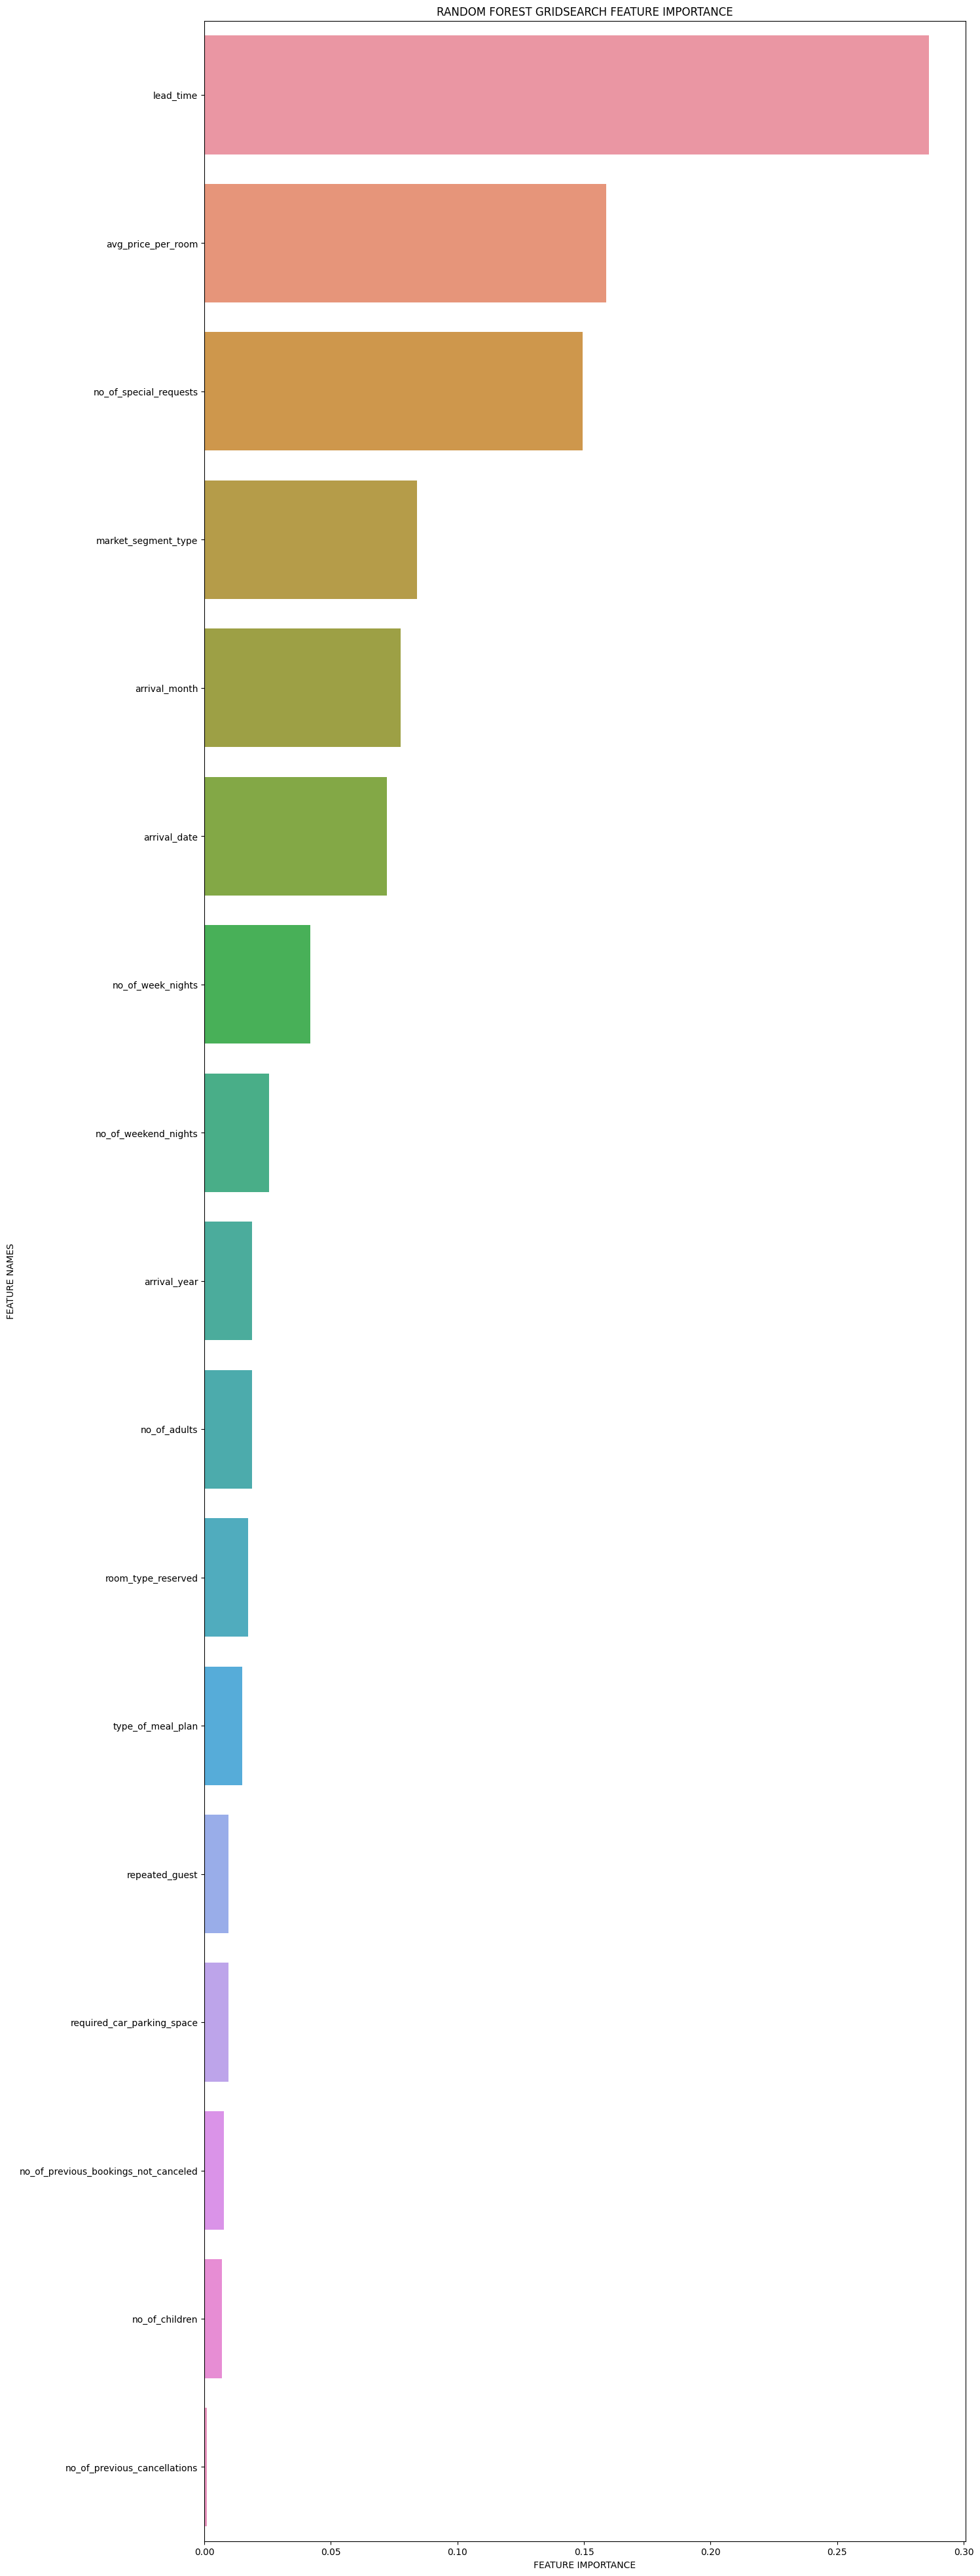

In [105]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [106]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4323,  827],
       [ 725, 2545]], dtype=int64)

In [107]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.8156769596199525

In [108]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.7547449584816133

In [109]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.7782874617737003

ANN

In [110]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [111]:
Hotel_model = Sequential()
Hotel_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
Hotel_model.add(Dense(512, activation = "relu"))
Hotel_model.add(Dense(1024, activation = "relu"))
Hotel_model.add(Dropout(0.2))
Hotel_model.add(Dense(1024, activation = "relu"))
Hotel_model.add(Dense(512, activation = "relu"))
Hotel_model.add(Dense(256, activation = "relu"))
Hotel_model.add(Flatten())
Hotel_model.add(Dense(512, activation = "relu"))
Hotel_model.add(Dropout(0.5))
Hotel_model.add(Dense(512, activation = "relu"))
Hotel_model.add(Dropout(0.5))
# Hotel_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
Hotel_model.add(Dense(1, activation = "sigmoid"))
Hotel_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [112]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
Hotel_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [113]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [114]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='hotel_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [115]:
history=Hotel_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100
503/512 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.7549
Epoch 1: val_accuracy improved from -inf to 0.71794, saving model to hotel_model.h5
512/512 [==============================] - 6s 5ms/step - loss: 0.5006 - accuracy: 0.7552 - val_loss: 0.5929 - val_accuracy: 0.7179
Epoch 2/100
505/512 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.7753
Epoch 2: val_accuracy improved from 0.71794 to 0.75828, saving model to hotel_model.h5
512/512 [==============================] - 2s 4ms/step - loss: 0.4761 - accuracy: 0.7752 - val_loss: 0.5277 - val_accuracy: 0.7583
Epoch 3/100
506/512 [============================>.] - ETA: 0s - loss: 0.4676 - accuracy: 0.7854
Epoch 3: val_accuracy improved from 0.75828 to 0.76904, saving model to hotel_model.h5
512/512 [==============================] - 2s 4ms/step - loss: 0.4676 - accuracy: 0.7852 - val_loss: 0.5260 - val_accuracy: 0.7690
Epoch 4/100
505/512 [============================>.] - ETA

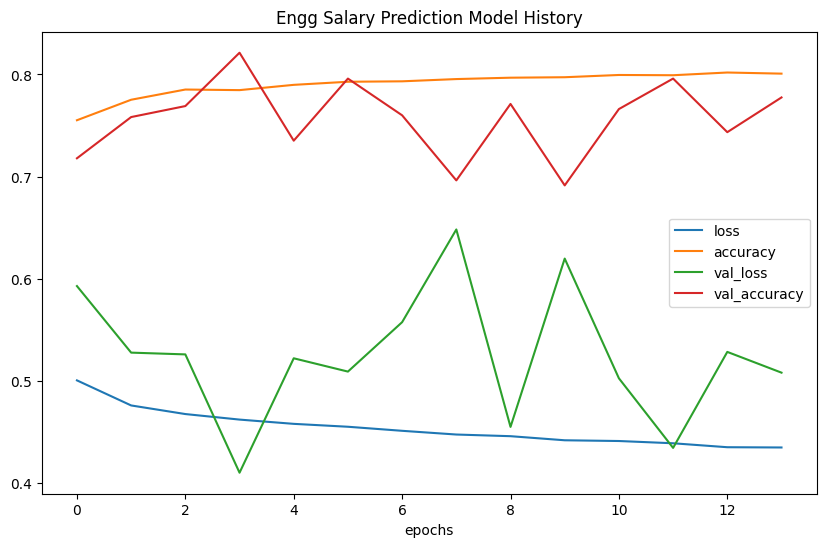

In [116]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [117]:
print("Evaluate Hotel_model against trained data")
score = Hotel_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (Hotel_model.metrics_names[1], score[1]*100))

print("Evaluate Hotel_model against test data")
score = Hotel_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (Hotel_model.metrics_names[1], score[1]*100))

Evaluate Hotel_model against trained data
score accuracy: 79.01%
Evaluate Hotel_model against test data
score accuracy: 78.16%


In [118]:
y_pred = Hotel_model.predict(X_test_RF)

264/264 [==============================] - 1s 1ms/step


In [119]:
# extract the predicted probabilities
p_pred = Hotel_model.predict(X_test_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

264/264 [==============================] - 1s 2ms/step
[0.03 0.97 0.65 ... 0.88 0.91 0.5 ]


In [120]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 1 1 ... 1 1 0]


In [121]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3939, 1211],
       [ 628, 2642]], dtype=int64)

In [122]:
cnn_accuracy = accuracy_score(y_test,y_pred)
cnn_accuracy

0.7815914489311164

In [123]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

0.6856994549701532

In [124]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

0.8079510703363915

CATBOOST

In [125]:
cat_features = list(range(0, X_train_RF.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [128]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train_RF, y_train,
        eval_set=(X_test_RF, y_test), 
        verbose=5
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.6575957	test: 0.6583228	best: 0.6583228 (0)	total: 149ms	remaining: 596ms
4:	learn: 0.5655342	test: 0.5677486	best: 0.5677486 (4)	total: 163ms	remaining: 0us

bestTest = 0.5677486113
bestIteration = 4

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [129]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.7896
Test set score: 0.7881


In [130]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
     verbose=5,
)

clf.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

Learning rate set to 0.5
0:	learn: 0.5515045	test: 0.5541259	best: 0.5541259 (0)	total: 4.25ms	remaining: 38.3ms
5:	learn: 0.4440048	test: 0.4545996	best: 0.4545996 (5)	total: 20.4ms	remaining: 13.6ms
9:	learn: 0.4273680	test: 0.4416506	best: 0.4416506 (9)	total: 33.7ms	remaining: 0us

bestTest = 0.4416506231
bestIteration = 9



In [131]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8067
Test set score: 0.8025


In [216]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(
    iterations=1000,
     verbose=5,
)

cat_clf.fit(
    X_train_RF, y_train,
    
    eval_set=(X_test_RF, y_test),
)

print('CatBoost model is fitted: ' + str(cat_clf.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf.get_params())

Learning rate set to 0.079247
0:	learn: 0.6539937	test: 0.6552173	best: 0.6552173 (0)	total: 10.8ms	remaining: 10.7s
5:	learn: 0.5390055	test: 0.5415163	best: 0.5415163 (5)	total: 49ms	remaining: 8.12s
10:	learn: 0.4899920	test: 0.4929550	best: 0.4929550 (10)	total: 84.9ms	remaining: 7.63s
15:	learn: 0.4671476	test: 0.4706985	best: 0.4706985 (15)	total: 118ms	remaining: 7.28s
20:	learn: 0.4535121	test: 0.4584485	best: 0.4584485 (20)	total: 151ms	remaining: 7.03s
25:	learn: 0.4448586	test: 0.4512034	best: 0.4512034 (25)	total: 181ms	remaining: 6.79s
30:	learn: 0.4385556	test: 0.4464525	best: 0.4464525 (30)	total: 215ms	remaining: 6.71s
35:	learn: 0.4337609	test: 0.4431559	best: 0.4431559 (35)	total: 249ms	remaining: 6.67s
40:	learn: 0.4298296	test: 0.4406825	best: 0.4406825 (40)	total: 283ms	remaining: 6.62s
45:	learn: 0.4266522	test: 0.4384583	best: 0.4384583 (45)	total: 315ms	remaining: 6.52s
50:	learn: 0.4236169	test: 0.4365538	best: 0.4365538 (50)	total: 344ms	remaining: 6.39s
55:	l

In [217]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8430
Test set score: 0.8169


In [218]:
y_pred = cat_clf.predict(X_test_RF)

In [219]:
cat_accuracy = cat_clf.score(X_test_RF, y_test)
cat_accuracy

0.8251781472684085

In [220]:
# precision
cat_pre = precision_score(y_test, y_pred)
cat_pre

0.7614892379290285

In [221]:
# recall
cat_rec = recall_score(y_test, y_pred)
cat_rec

0.8006116207951071

ADABOOST

In [156]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train_RF, y_train)

In [157]:
print('Training set score: {:.4f}'.format(model1.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test_RF, y_test)))

Training set score: 0.7979
Test set score: 0.7890


In [158]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train_RF, y_train)

In [159]:
print('Training set score: {:.4f}'.format(model1.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(model1.score(X_test_RF, y_test)))

Training set score: 0.7995
Test set score: 0.7903


Gridsearch

In [160]:
c=[i for i in range(1,11)]
c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
              "base_estimator__max_depth":[i for i in range(1,11)],
              "n_estimators": [100,150,200,250,300,500,1000]
             }


DTC = DecisionTreeClassifier(random_state = 11)

ABC = AdaBoostClassifier(base_estimator = DTC,random_state=11)
#using decision tree as base

# run grid search
grid_search_ABC_ada = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',verbose=10, cv=3,n_jobs=6)

grid_search_ABC_ada.fit(X_train_RF,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=11),
                                          random_state=11),
             n_jobs=6,
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                         'n_estimators': [100, 150, 200, 250, 300, 500, 1000]},
             scoring='roc_auc', verbose=10)

In [234]:
grid_search_ABC_ada.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 150}

In [235]:
print('Training set score: {:.4f}'.format(grid_search_ABC_ada.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC_ada.score(X_test_RF, y_test)))

Training set score: 0.9115
Test set score: 0.8866


In [236]:
y_pred = grid_search_ABC_ada.predict(X_test_RF)

In [237]:
ada_accuracy = grid_search_ABC_ada.score(X_test_RF, y_test)
ada_accuracy

0.8865657195451442

In [238]:
# precision
ada_pre = precision_score(y_test, y_pred)
ada_pre

0.7471164936562861

In [239]:
# recall
ada_rec = recall_score(y_test, y_pred)
ada_rec

0.7923547400611621

LightGBM

In [177]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_RF, y_train)

LGBMClassifier()

In [178]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.8430
Test set score: 0.8169


In [179]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
              "n_estimators": [1, 2,10,25,50,100,200,500,700,1000]
             }



LGB = lgb.LGBMClassifier(random_state=11,objective='binary')
#using decision tree as base

# run grid search
grid_search_ABC = GridSearchCV(LGB, param_grid=param_grid,verbose=10, cv=3,n_jobs=6)

grid_search_ABC.fit(X_train_RF,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(objective='binary', random_state=11),
             n_jobs=6,
             param_grid={'n_estimators': [1, 2, 10, 25, 50, 100, 200, 500, 700,
                                          1000]},
             verbose=10)

In [180]:
print('Training set score: {:.4f}'.format(grid_search_ABC.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search_ABC.score(X_test_RF, y_test)))

Training set score: 0.9078
Test set score: 0.8192


In [181]:
y_pred = grid_search_ABC.predict(X_test_RF)

In [182]:
lgb_accuracy = grid_search_ABC.score(X_test_RF, y_test)
lgb_accuracy

0.8192399049881235

In [183]:
# precision
lgb_pre = precision_score(y_test, y_pred)
lgb_pre

0.7543655413271245

In [184]:
# recall
lgb_rec = recall_score(y_test, y_pred)
lgb_rec

0.7926605504587156

In [240]:
# creating performance dictionary
performance = {'Accuracy_Score':[cat_accuracy,ada_accuracy,lgb_accuracy,log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy],
              'Precision':[cat_pre,ada_pre,lgb_pre,log_pre,knn_pre, rfcv_pre, cnn_pre],
              'Recall': [cat_rec,ada_rec,lgb_rec,log_rec, knn_rec, rfcv_rec, cnn_rec]}

In [241]:
performance_df = pd.DataFrame(data = performance, index= ['CatBoostClassifier GridSearch','AdaBoostClassifier Gridsearch','LightGBM Classifier Gridsearch','Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN'])

In [242]:
performance_df.sort_values(by=['Accuracy_Score','Precision','Recall'],ascending=False)

,Accuracy_Score,Precision,Recall
AdaBoostClassifier Gridsearch,0.886566,0.747116,0.792355
CatBoostClassifier GridSearch,0.825178,0.761489,0.800612
LightGBM Classifier Gridsearch,0.819240,0.754366,0.792661
RandomForest Gridsearch,0.815677,0.754745,0.778287
ANN,0.781591,0.685699,0.807951
Logistic Regression,0.754038,0.663396,0.744343
KNeighbors,0.697625,0.605233,0.636697


Adaboost works best!

Now on test data!

In [21]:
test_df = pd.read_csv('test.csv')
test_df.shape

(28068, 18)

In [22]:
test_df1 = test_df.copy(deep=True)
test_df1.drop(['id'],axis=1, inplace=True)
test_df1.shape

(28068, 17)

In [23]:
test_df1_RF = scaler.fit_transform(test_df1)
test_df1_RF = pd.DataFrame(test_df1_RF,columns=cols)

In [202]:
test_df1_RF.shape

(28068, 17)

In [29]:
sample = pd.read_csv('sample_submission.csv')

In [204]:
sample.head()

,id,booking_status
0,42100,0.392
1,42101,0.392
2,42102,0.392
3,42103,0.392
4,42104,0.392


LGBM preds

In [205]:
y_pred = grid_search_ABC.predict(test_df1_RF)

In [206]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [207]:
submission = pd.DataFrame(data={'id': sample.id, 'booking_status': y_pred})
submission.head()

,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,1


In [208]:
submission.to_csv('lgbm_preds.csv',index=False)

catboost preds

In [228]:
y_pred = cat_clf.predict(test_df1_RF)

In [229]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [230]:
submission = pd.DataFrame(data={'id': sample.id, 'booking_status': y_pred})
submission.head()

,id,booking_status
0,42100,0
1,42101,0
2,42102,1
3,42103,0
4,42104,0


In [231]:
submission.to_csv('catboost_preds.csv',index=False)

adaboost preds

In [243]:
y_pred = grid_search_ABC_ada.predict(test_df1_RF)

In [244]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [245]:
submission = pd.DataFrame(data={'id': sample.id, 'booking_status': y_pred})
submission.head()

,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,0


In [246]:
submission.to_csv('adaboost_preds.csv',index=False)

Training adabooost and catboost on full data

In [24]:
X_RF = scaler.fit_transform(X)
X_RF = pd.DataFrame(X_RF,columns=cols)

In [25]:
X_RF.shape

(42100, 17)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


DTC = DecisionTreeClassifier(random_state = 11,max_depth=2)

ABC = AdaBoostClassifier(base_estimator = DTC,random_state=11,n_estimators=150)
#using decision tree as base

# run grid search
# grid_search_ABC_ada = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',verbose=10, cv=3,n_jobs=6)

ABC.fit(X_RF,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=11),
                   n_estimators=150, random_state=11)

In [30]:
y_pred = ABC.predict(test_df1_RF)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
submission = pd.DataFrame(data={'id': sample.id, 'booking_status': y_pred})
submission.head()

,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,0


In [33]:
submission.to_csv('adaboost_preds_fulldata.csv',index=False)

catboost full data preds

In [39]:
from catboost import CatBoostClassifier
cat_clf_fulldata = CatBoostClassifier(
    iterations=1000,
     verbose=5,
)

cat_clf_fulldata.fit(
    X_RF, y,
)

print('CatBoost model is fitted: ' + str(cat_clf_fulldata.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf_fulldata.get_params())

Learning rate set to 0.050875
0:	learn: 0.6666342	total: 10.1ms	remaining: 10.1s
5:	learn: 0.5745961	total: 62.9ms	remaining: 10.4s
10:	learn: 0.5221609	total: 114ms	remaining: 10.2s
15:	learn: 0.4919773	total: 158ms	remaining: 9.73s
20:	learn: 0.4734606	total: 207ms	remaining: 9.65s
25:	learn: 0.4613484	total: 257ms	remaining: 9.64s
30:	learn: 0.4528486	total: 306ms	remaining: 9.56s
35:	learn: 0.4470398	total: 349ms	remaining: 9.34s
40:	learn: 0.4424313	total: 388ms	remaining: 9.08s
45:	learn: 0.4385597	total: 432ms	remaining: 8.96s
50:	learn: 0.4359190	total: 483ms	remaining: 8.99s
55:	learn: 0.4334260	total: 532ms	remaining: 8.97s
60:	learn: 0.4313273	total: 582ms	remaining: 8.96s
65:	learn: 0.4297554	total: 631ms	remaining: 8.92s
70:	learn: 0.4281832	total: 674ms	remaining: 8.82s
75:	learn: 0.4265335	total: 722ms	remaining: 8.77s
80:	learn: 0.4250174	total: 768ms	remaining: 8.71s
85:	learn: 0.4236958	total: 816ms	remaining: 8.67s
90:	learn: 0.4224488	total: 863ms	remaining: 8.62s
9

In [40]:
y_pred = cat_clf_fulldata.predict(test_df1_RF)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
submission = pd.DataFrame(data={'id': sample.id, 'booking_status': y_pred})
submission.head()

,id,booking_status
0,42100,0
1,42101,0
2,42102,0
3,42103,0
4,42104,0


In [43]:
submission.to_csv('catboost_preds_fulldata.csv',index=False)